<a href="https://colab.research.google.com/github/yoursenpai69/malaria-cell-recognition-177/blob/main/Copy_of_Ex04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
# to share the GPU resources for multiple sessions
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True # dynamically grow the memory used on the GPU
config.log_device_placement = True # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

%matplotlib inline

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



**Dataset Download Link**
[https://drive.google.com/file/d/1ULKLK_R0qsLho6PzfUIOwTXOStk3w5jd/view?usp=sharing](https://drive.google.com/file/d/1ULKLK_R0qsLho6PzfUIOwTXOStk3w5jd/view?usp=sharing)

In [ ]:
# Upload this file to your google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# for Google Colab
!tar --skip-old-files -xvf '/content/drive/MyDrive/Dataset/cell_images.tar.xz' -C '/content/drive/MyDrive/Dataset/'

Streaming output truncated to the last 5000 lines.
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_229.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_245.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_251.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_261.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_41.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_54.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_57.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142452_cell_85.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_104.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_109.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_128.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_142.png
cell_images/train/uninfected/C228ThinF_IMG_20151112_142730_cell_167.png
cell_images/train

In [5]:
# for Google Colab
my_data_dir = '/content/drive/MyDrive/Dataset/cell_images'

In [ ]:
# for college server
my_data_dir = '/home/ailab/hdd/dataset/cell_images'

In [6]:
os.listdir(my_data_dir)

['test', 'train']

In [7]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
len(os.listdir(train_path+'/uninfected/'))

12479

In [ ]:
len(os.listdir(train_path+'/parasitized/'))

In [10]:
os.listdir(train_path+'/parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_img= imread(train_path+
                 '/parasitized/'+
                 os.listdir(train_path+'/parasitized')[0])

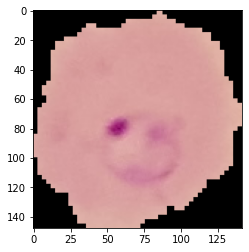

In [12]:
plt.imshow(para_img)

In [13]:
# Checking the image dimensions
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

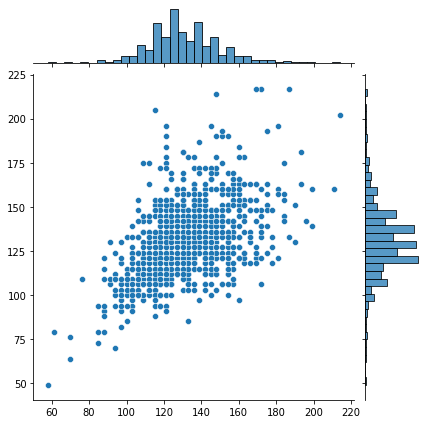

In [14]:
sns.jointplot(x=dim1,y=dim2)

In [15]:
image_shape = (130,130,3)

In [17]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

In [16]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [18]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [19]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [53]:
model = models.Sequential()
# Write your code here
model.add(layers.Input(shape=image_shape))
model.add(layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 130, 130, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 130, 130, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 65, 65, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 65, 65, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)      

In [54]:
batch_size = 16

In [34]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The dimensions to which all image

In [55]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [56]:
train_image_gen.batch_size

16

In [57]:
len(train_image_gen.classes)

24958

In [58]:
train_image_gen.total_batches_seen

0

In [59]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [60]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [61]:
results = model.fit(train_image_gen,epochs=10,
                              validation_data=test_image_gen
                             )

Epoch 1/10
1560/1560 [==============================] - 179s 114ms/step - loss: 0.6841 - accuracy: 0.5539 - val_loss: 0.6779 - val_accuracy: 0.5615
Epoch 2/10
1560/1560 [==============================] - 171s 110ms/step - loss: 0.6658 - accuracy: 0.6020 - val_loss: 0.6600 - val_accuracy: 0.6042
Epoch 3/10
1560/1560 [==============================] - 171s 109ms/step - loss: 0.3286 - accuracy: 0.8564 - val_loss: 0.2049 - val_accuracy: 0.9385
Epoch 4/10
1560/1560 [==============================] - 170s 109ms/step - loss: 0.1867 - accuracy: 0.9415 - val_loss: 0.1897 - val_accuracy: 0.9381
Epoch 5/10
1560/1560 [==============================] - 171s 110ms/step - loss: 0.1688 - accuracy: 0.9461 - val_loss: 0.1639 - val_accuracy: 0.9438
Epoch 6/10
1560/1560 [==============================] - 170s 109ms/step - loss: 0.1587 - accuracy: 0.9496 - val_loss: 0.1537 - val_accuracy: 0.9454
Epoch 7/10
1560/1560 [==============================] - 171s 110ms/step - loss: 0.1557 - accuracy: 0.9495 - val_

In [62]:
model.save('cell_model.h5')

In [63]:
losses = pd.DataFrame(model.history.history)

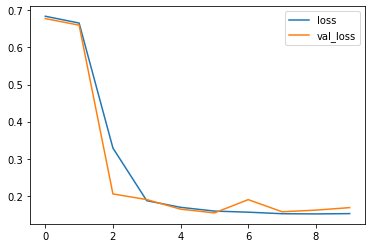

In [64]:
losses[['loss','val_loss']].plot()

In [65]:
model.metrics_names

['loss', 'accuracy']

In [66]:
model.evaluate(test_image_gen)

163/163 [==============================] - 15s 92ms/step - loss: 0.1611 - accuracy: 0.9458


[0.16111473739147186, 0.9457692503929138]

In [67]:
pred_probabilities = model.predict(test_image_gen)

In [68]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [69]:
predictions = pred_probabilities > 0.5

In [70]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.95      0.94      2600
weighted avg       0.95      0.94      0.94      2600



In [71]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1200,  100],
       [  43, 1257]])